<a href="https://colab.research.google.com/github/RoopamSeal/Twitter_Stocks/blob/main/TwitterStockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib numpy pandas seaborn          # installing standard packages

import matplotlib.pyplot as plt                       # importing the standard libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Twitter Stock Market Dataset.csv')     # mounting the datset in the environment
print(df.head(10))

         Date       Open       High        Low      Close  Adj Close  \
0  07-11-2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1  08-11-2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2  11-11-2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3  12-11-2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4  13-11-2013  41.029999  42.869999  40.759998  42.599998  42.599998   
5  14-11-2013  42.340000  45.669998  42.240002  44.689999  44.689999   
6  15-11-2013  45.250000  45.270000  43.430000  43.980000  43.980000   
7  18-11-2013  43.500000  43.950001  40.849998  41.139999  41.139999   
8  19-11-2013  41.389999  41.900002  40.000000  41.750000  41.750000   
9  20-11-2013  41.400002  41.750000  40.509998  41.049999  41.049999   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  
5   11099433.0  
6    8010663.0  
7   12810624.0  
8    7436616.0  
9    5767325.0  


In [4]:
print(df.info())      # studying the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB
None


In [5]:
missing_values = df.isnull().sum()            # counting the number of missing values

print("Missing Values:")
print(missing_values)

df = df.dropna()                              # removing the missing values

Missing Values:
Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


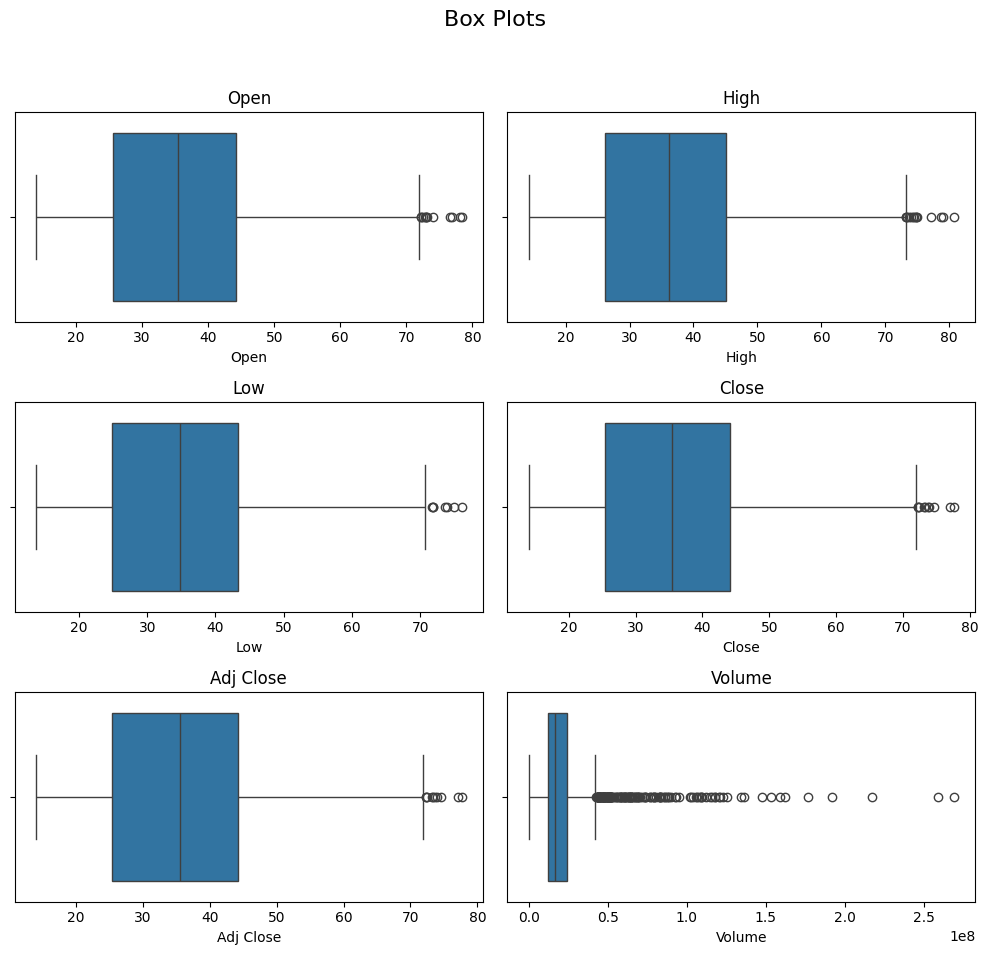

In [6]:
#creating box plot to identify outliers
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# creating subplots to plot the 6 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.suptitle('Box Plots', fontsize = 16)

axes = axes.flatten()

#plotting the subplots by enumerate
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

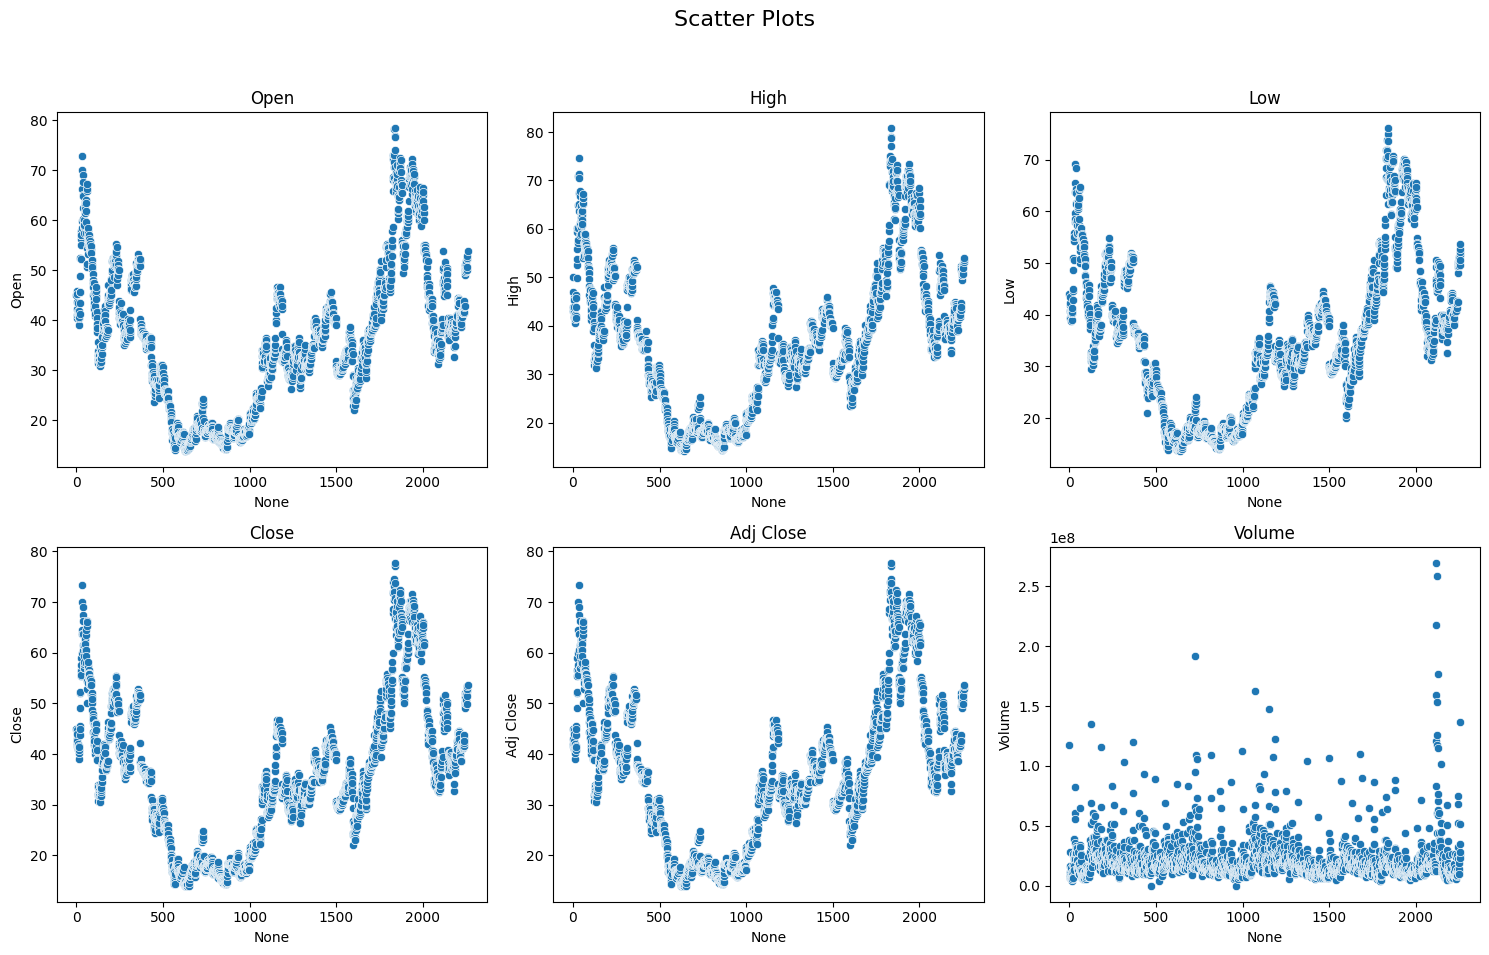

In [7]:
# creating scatter plot to identify outliers
columns_to_visualize_outliers = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Scatter Plots', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(columns_to_visualize_outliers):
    sns.scatterplot(x=df.index, y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
# importing datetime package to analyze the stock prices over the years
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go

#we can visualize the ups and downs of the stock proces in a comparitive manner to analyze the trends
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])],
                   layout=dict(template='plotly_dark'))
figure.update_layout(title="Twitter Stock Prices Over the Years",
                     xaxis_rangeslider_visible=False)
figure.show()

In [10]:
# to visualize the closing values of Twitter stocks to understand how well the stocks performed
import plotly.express as px
figure = px.bar(df,
                x = "Date",
                y= "Close",
                color="Close",
                template='plotly_dark')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [11]:
# creating another column Up to indicate whether the the stock went up or down overall
df["Up"] = df["Open"] > df["Close"]
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  07-11-2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1  08-11-2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2  11-11-2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3  12-11-2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4  13-11-2013  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  
0  117701670.0   True  
1   27925307.0   True  
2   16113941.0  False  
3    6316755.0   True  
4    8688325.0  False  


In [14]:
# to calculate the percentage of the stocks
def calc_per(data):
    return np.divide(data["Open"], data["Close"])

In [15]:
# creating a new column Percentage
df["Percentage"] = df.apply(calc_per, axis="columns")
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  07-11-2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1  08-11-2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2  11-11-2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3  12-11-2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4  13-11-2013  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  
0  117701670.0   True    1.004454  
1   27925307.0   True    1.102761  
2   16113941.0  False    0.944056  
3    6316755.0   True    1.042005  
4    8688325.0  False    0.963146  


In [21]:
# plotting the changes in percentage with time and check whether profit or loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Percentage'],
                         mode='lines+markers',
                         name='Percentage'))

# Define colors for profit and loss
colors = {'Profit': 'green', 'Loss': 'red'}

# Add annotations for profit and loss
for index, row in df.iterrows():
    if row['Up'] in colors:
        fig.add_annotation(x=row['Date'], y=row['Percentage'],
                           text=row['Profit_Loss'],
                           font=dict(color=colors[row['Profit_Loss']], size=12),
                           showarrow=False)

# Set plot title and axe
fig.update_layout(title='Percentage Changes Over Time with Profit/Loss',
                  xaxis_title='Date',
                  yaxis_title='Percentage')
fig.show()

In [22]:
# creating a Year column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-07-11  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-08-11  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-12-11  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  Year  
0  117701670.0   True    1.004454  2013  
1   27925307.0   True    1.102761  2013  
2   16113941.0  False    0.944056  2013  
3    6316755.0   True    1.042005  2013  
4    8688325.0  False    0.963146  2013  


<ipython-input-22-8bf5dca7f75e>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [23]:
data_by_year = df.groupby("Year")           # grouping data according to mean and standard deviation wrt Year

mvolumes = data_by_year["Volume"].mean()
sd = data_by_year["Volume"].std()

Text(0.5, 1.0, 'Mean Number of Shares Traded by Year')

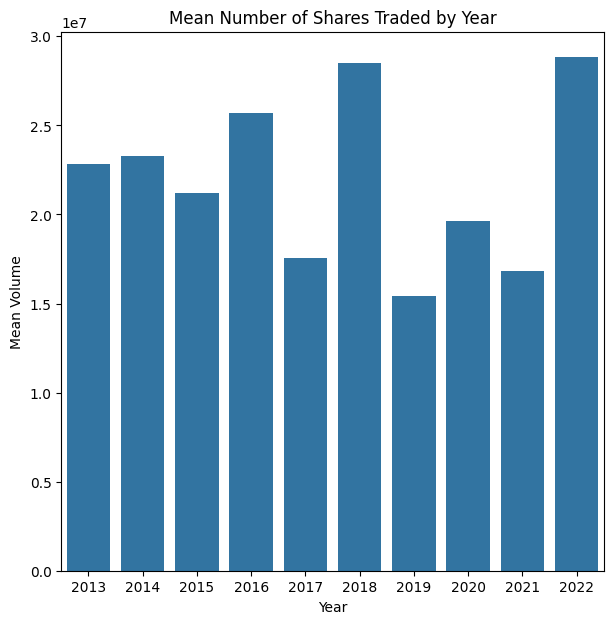

In [24]:
plt.figure(figsize=(7,7))                                 # Mean vs Year
sns.barplot(x=mvolumes.index, y=mvolumes.values)
sns.set_style("darkgrid")
plt.xlabel("Year")
plt.ylabel("Mean Volume")
plt.title("Mean Number of Shares Traded by Year")

Text(0.5, 1.0, 'Standard Deviation of Shares Traded per Day by Year')

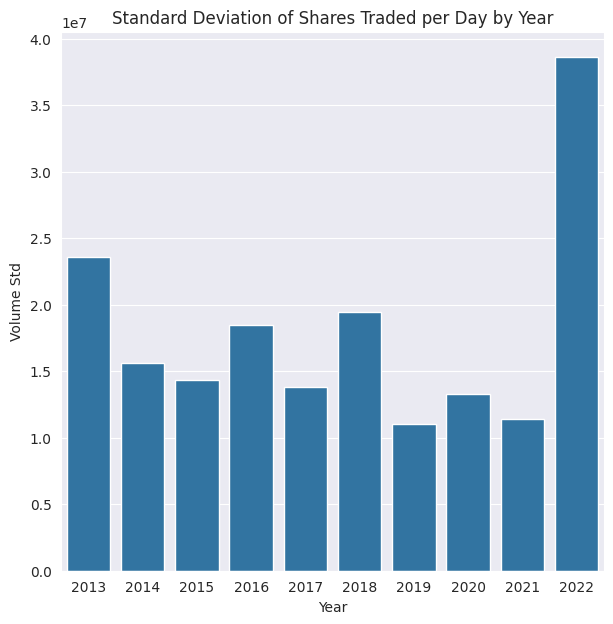

In [25]:
plt.figure(figsize=(7,7))                       # Std Deviation vs Year
sns.barplot(x=sd.index, y=sd.values)
sns.set_style("darkgrid")
plt.xlabel("Year")
plt.ylabel("Volume Std")
plt.title("Standard Deviation of Shares Traded per Day by Year")

Text(0.5, 1.0, 'Peak Price for Twitter Stock from 2013-2022')

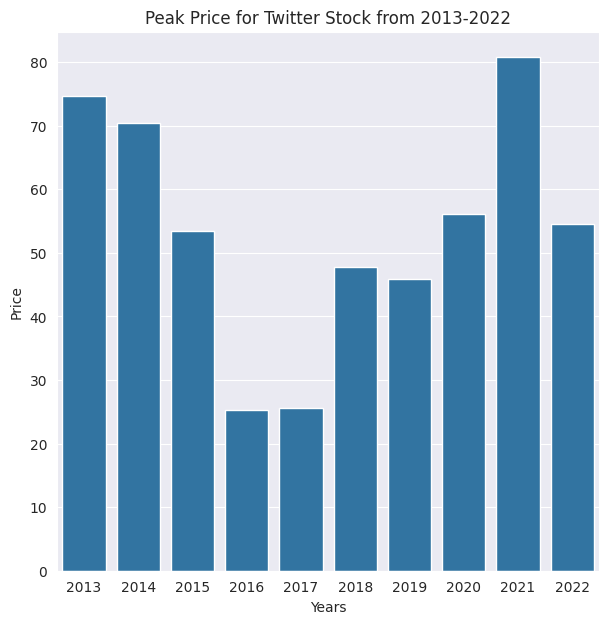

In [26]:
peaks = data_by_year["High"].max()                  # Peak Price vs Year
plt.figure(figsize=(7, 7))
sns.barplot(x=peaks.index, y=peaks.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Peak Price for Twitter Stock from 2013-2022")

Text(0.5, 1.0, 'Lowest Price for Twitter Stock from 2013-2022')

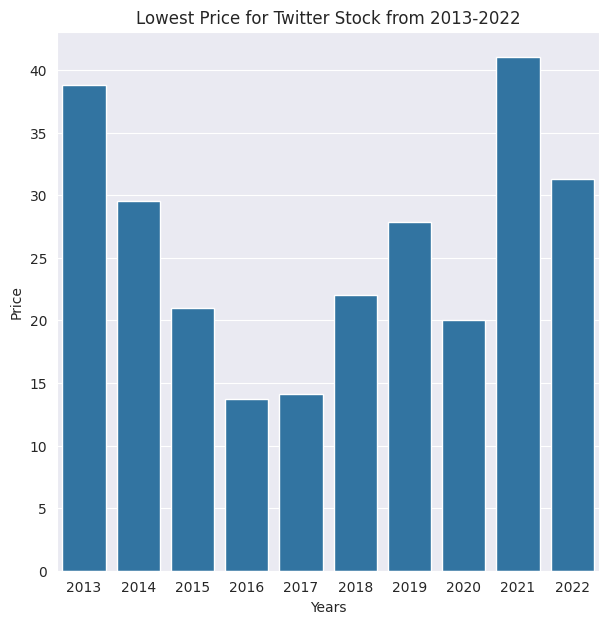

In [27]:
valleys = data_by_year["Low"].min()            # Lowest Price vs Year
plt.figure(figsize=(7,7))
sns.barplot(x=valleys.index, y=valleys.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Lowest Price for Twitter Stock from 2013-2022")

In [28]:
!pip install scikit-learn                               # importing the packages for preprocessing for machine learning
from sklearn.model_selection import train_test_split

In [29]:
y = df['Close']                   # sorting the dataset into training and testing model
X = df.drop(['Date', 'Close', 'Adj Close'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1694, 7)
y_train Shape: (1694,)
X_test Shape: (565, 7)
y_test Shape: (565,)


In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso                 # importing the libraries for machine learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [31]:
linear_reg_model = LinearRegression()                # defining the ML models
random_forest = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR()
gbr = GradientBoostingRegressor()

In [32]:
linear_reg_model.fit(X_train, y_train)                # creating training and testing model
random_forest.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
svr.fit(X_train, y_train)
gbr.fit(X_train, y_train)

linear_reg_predictions = linear_reg_model.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
ridge_predictions = ridge.predict(X_test)
lasso_predictions = lasso.predict(X_test)
svr_predictions = svr.predict(X_test)
gbr_predictions = gbr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.77805e-18): result may not be accurate.



In [33]:
from sklearn.metrics import mean_squared_error, r2_score               # calculating mse and r squared error for
                                                                       # checking the accuracy of the ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")
    print("\n")


Linear Regression:
  Mean Squared Error: 0.07348633546353907
  R-squared: 0.9995973044159435


Ridge Regression:
  Mean Squared Error: 0.11664993219421495
  R-squared: 0.9993607735060023




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.68685e-18): result may not be accurate.



Random Forest:
  Mean Squared Error: 0.15741740765487214
  R-squared: 0.9991373730297426


Lasso:
  Mean Squared Error: 0.29562154234905347
  R-squared: 0.9983800323025361


SVR:
  Mean Squared Error: 180.59403364711173
  R-squared: 0.010368126293108237


Gradient Boosting Regression:
  Mean Squared Error: 0.1386690403485582
  R-squared: 0.9992401116501255




In [34]:
models = ["Linear Regression", "Random Forest", "Ridge Regression", "Lasso Regression", "SVM Regression", "Gradient Boosting Regression"]
mse_scores = [0.07908650323044851, 0.1556771760723141, 0.12204863642375278, 0.30430600021127663, 178.32436695448916, 0.13278703092262187]
r2_scores = [0.9995665808101727, 0.9991468395646315, 0.9993311346568937, 0.9983323063394667, 0.022725756041174883, 0.9992722848398752]

best_r2_index = r2_scores.index(max(r2_scores))

best_mse_index = mse_scores.index(min(mse_scores))

print(f"The best model based on R-squared score is: {models[best_r2_index]}")
print(f"R-squared score: {r2_scores[best_r2_index]}")

print(f"The best model based on MSE is: {models[best_mse_index]}")
print(f"MSE: {mse_scores[best_mse_index]}")

The best model based on R-squared score is: Linear Regression
R-squared score: 0.9995665808101727
The best model based on MSE is: Linear Regression
MSE: 0.07908650323044851


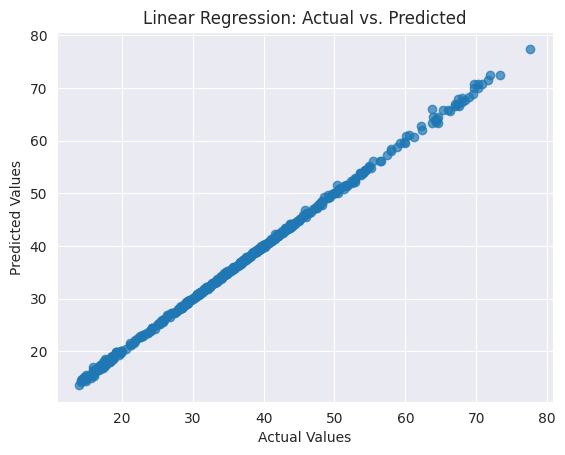

In [ ]:
# plotting the scatter plot to check the actual and predicted values
linear_reg_predictions = linear_reg_model.predict(X_test)


plt.scatter(y_test, linear_reg_predictions, alpha=0.7)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

In [ ]:
# robust scaling to perform normalization
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_robust_scaled, y_train)
predictions = linear_reg_model.predict(X_test_robust_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.07908650315586849
R-squared (R2): 0.9995665808105814


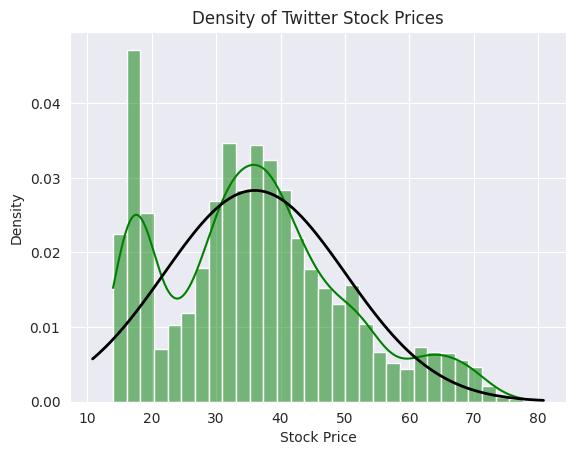

In [ ]:
from scipy.stats import norm
stock_prices = df['Close']
sns.histplot(stock_prices, kde=True, bins=30, stat="density", color="green")
mu, std = norm.fit(stock_prices)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Density of Twitter Stock Prices")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.show()
